In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def random_points_in_hypercube(dimension: int, points_number: int) -> np.ndarray:
    return np.random.uniform(low=0.0, high=1.0, size=(points_number, dimension))

def calculate_distances(points: np.ndarray) -> np.ndarray:
    return [np.sum((p1 - p2) ** 2) for i1, p1 in enumerate(points) for i2, p2 in enumerate(points) if i1 < i2]

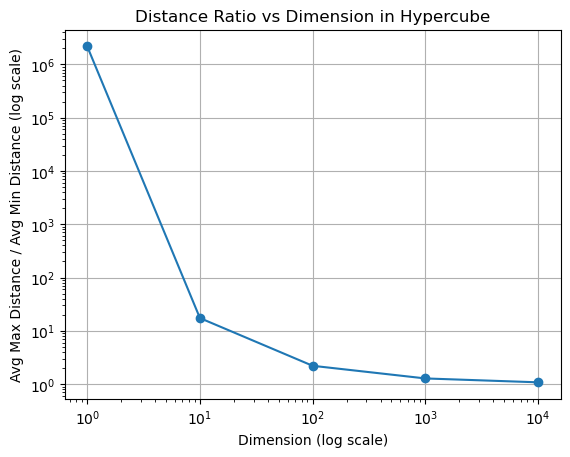

In [42]:
POINTS_NUMBER = 50
DIMENSIONS = [1, 10, 100, 1000, 10_000]
REPEATS = 100

ratios = []
for dim in DIMENSIONS:
    min_distances = []
    max_distances = []
    for _ in range(REPEATS):
        points = random_points_in_hypercube(dim, POINTS_NUMBER)
        distances = calculate_distances(points)
        min_distances.append(np.min(distances))
        max_distances.append(np.max(distances))

    avg_min_distance = np.mean(min_distances)
    avg_max_distance = np.mean(max_distances)

    ratios.append(avg_max_distance / avg_min_distance)

plt.plot(DIMENSIONS, ratios, marker='o')
plt.xlabel('Dimension (log scale)')
plt.ylabel('Avg Max Distance / Avg Min Distance (log scale)')
plt.title('Distance Ratio vs Dimension in Hypercube')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()